# Factors affecting the accuracy of WGP
- Marker density
- Population size
- Underlying trait genetic architecture
- relatedness between training and validtion individuals
- prediction model

Genetic architecture of the complext trait under consideration is known as one influential factor affecting the accuracy of WGP but also the relative superiourity of different prediction method. 

Genome Best Linear Unbiased Prediction (GBLUP) method in the prediction of complex trait in highly related populations which is the typical situation in agricultal populations. 

When major genes or even genes with moderate effets exists, however, variable selection models such as BayesB can predict genomic estimated breeding values more accuractely. (In this case it will be FP and MY).

If the genetic architecture of a trait under consideration is un- known, it is hard to choose a proper WGP approach without a serial of laborsome model comparisons. These situations are quite common, such as with traits of low heritability, populations of small size, and novel traits with unknown genetic architecture. This increases the computing burden and uncertainty of implementation for WGP. Hence, a sophisticated model which blends the robustness of GBLUP and the advantage of BayesB appears attractive from an implementa- tion point of view.

The BayesA assumes that all SNPs have genetic effects and the variance of marker effects should obey the t-distribution, whereas BayesB assumes that only a small proportion of SNPs have an effect.

The genetic architecture of a trait refers to a comprehensive description of how genes and the environment conspire to produce phenotypes (Figure 1), including the number of quantitative trait loci (QTL) that contribute to variability of the trait between individuals, their effect sizes, whether alleles for causal polymorphisms are additive, dominant, or recessive and their frequency in the population, patterns of gene-gene and gene-environment effects, and levels of pleiotropy [2]. 

G - Relationship matrix
T - trait-specific variance-covariance matrix

T matrix is being built
G matrix was weighted by the p-value calculated in GWAS.

Trait-specific G matrix weighted by derived marker effects within the iteratioin procedure. 

GWAS/QTL mapping results were used as prior weights to build T matrix. 

T matrix is important.

BLUP|GA by Zhang et al 2014
T-matrix is weighted by sum of general realised relationship matrix G AND a relationship matrix S.

Matrix S is ts built based on prior information on genetic architecture. S is constructed with only information extracted from the dataset at hand. 

WGP models 
- Variance - covariance structure of additive genetic effects among all individuals was described by the pedigree-based numerator relationship matrix A. 

G matrix is used to replace the A matrix. 

Best linear unbiased prediction using marker-based genetic relationship matrix 
y = Xu + Zu + e

u ~ N(0,sigma2G)
sigma2 = additive genetic variance
G - genomic relationship matrix for all individuals.

X, Z = incidence matrices relating the overall mean and additive genetic values to the phenotypic records. 

MME = Mixed model equations


## The German Holstein genomic prediction population

A German Holstein genomic prediction population comprising 5024 bulls, provided by Vereinigte Informationssysteme Tierhaltung w.V., was used to validate our new strategy based on the BLUPjGA ap- proach. All bulls were genotyped with the Illumina Bovine SNP50 Beadchip (Matukumalli et al. 2009). 

After quality control, 42,551 SNPs remained for our further analyses. Highly reliable conventional estimated breeding values (EBVs) of three traits, milk fat percentage (FP), milk yield (MY), and somatic cell score (SCS), were available for all bulls. 

These three traits were used in the present study because of the well-established knowledge from previous studies (Hu et al. 2013; Zhang et al. 2014) and their representative distinct genetic architectures. They may represent three genetic architectures of complex traits that are composed of 

(1) one major gene and a large number of small effect loci (FP) <br>
(2) few moderate effect loci and many small effect loci (MY) <br>
(3) many loci with small effects (SCS) <br>


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score


In [5]:
from keras import regularizers

In [6]:
df = pd.read_csv('cattle_genotypes.txt', sep='\t')

In [7]:
#This dataframe only has SNPs value for the cow. 
df.head()

,Animal,SNP1,SNP2,SNP3,SNP4,SNP5,SNP6,SNP7,SNP8,SNP9,...,SNP42542,SNP42543,SNP42544,SNP42545,SNP42546,SNP42547,SNP42548,SNP42549,SNP42550,SNP42551
0,Anim1,1,2,2,2,0,0,0,2,1,...,2,1,2,0,0,1,2,2,1,2
1,Anim2,0,1,2,2,2,0,2,2,1,...,2,2,1,1,2,2,2,1,2,2
2,Anim3,0,2,1,1,2,0,2,1,0,...,2,2,1,0,1,2,2,1,2,2
3,Anim4,1,2,2,1,2,0,2,1,0,...,2,1,1,1,1,1,1,2,2,1
4,Anim5,1,2,2,2,1,0,1,1,1,...,1,2,2,0,1,2,2,2,2,2


In [8]:
len(df.Animal.unique())

5024

There are 5,024 cows.

In [9]:
#This dataset contains the Y-values.
phenotype = pd.read_csv('german_cow_phenotype.txt', sep='\t')

In [10]:
phenotype.head()

,id,mkg,fpro,scs
0,Anim1,-1.765576,-0.265635,0.484116
1,Anim2,-1.268380,0.302682,-0.198056
2,Anim3,-0.437640,-1.047071,-0.709684
3,Anim4,-1.153043,-0.336675,-1.732942
4,Anim5,-1.006533,-0.976031,0.654659


In [11]:
phenotype.shape

(5024, 4)

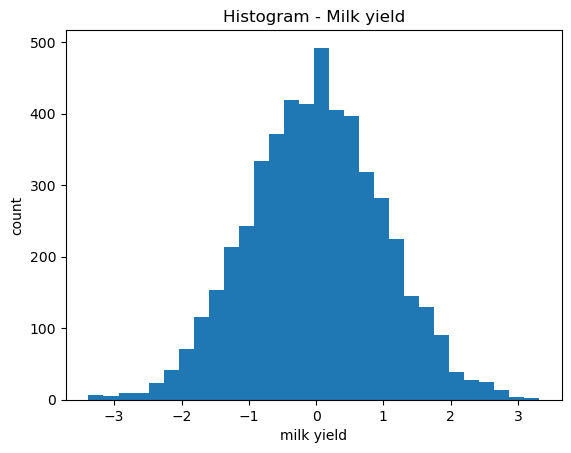

In [9]:
#Histogram of Milk Yield.

plt.hist(phenotype.mkg, bins=30)
plt.xlabel('milk yield')
plt.ylabel('count')
plt.title('Histogram - Milk yield')
plt.savefig('image_1_histogram_mfg.png')

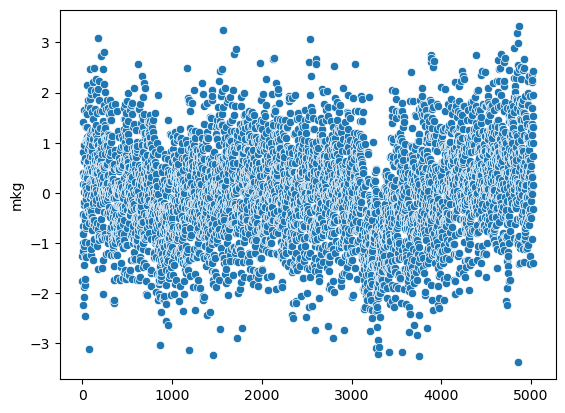

In [10]:
sns.scatterplot(data=phenotype.mkg)
plt.savefig('image_2_scatter_plot_milk_yield.png')

In [13]:
phenotype_mkg = pd.DataFrame(phenotype[['id','mkg']])

In [14]:
phenotype_mkg.head()

,id,mkg
0,Anim1,-1.765576
1,Anim2,-1.268380
2,Anim3,-0.437640
3,Anim4,-1.153043
4,Anim5,-1.006533


## Milk yield

In [15]:
#Merging the SNPs data with milk yield. 
data = pd.merge(df,phenotype_mkg,how='inner', left_on='Animal', right_on='id')

In [13]:
df.shape

(5024, 42552)

In [14]:
data.shape

(5024, 42554)

In [15]:
data.columns[:3]

Index(['Animal', 'SNP1', 'SNP2'], dtype='object')

In [16]:
# Create a list of SNPS that I want to use. 
# Features are the list of SNPs. 
features = data.columns[1:-2].tolist()

In [17]:
features[:5]

['SNP1', 'SNP2', 'SNP3', 'SNP4', 'SNP5']

## EDA

### Removes the SNPS that are low diversity

In [18]:
def is_dominated(series):
    '''
    Find the SNPs that more than 80% of the population has the same.
    i.e. If more than 80% of the population has the same mutation of SNPx, 
    SNPx is dominated and will be in the list. 
    '''

    # Counting the number of variation of SNPs, how many rows have 0, 1, 2 SNPs?
    value_counts = series.value_counts(normalize=True)

    #If the length of value_counts = 0, then there is no series to check. 
    if len(value_counts) == 0:
        return False
    
    #If the length of the value_count is not 0, then check the first value on the list. 
    dominant_percentage = value_counts.iloc[0]

    #If the first value on the list is more than 80%, return the percentage. 
    return dominant_percentage >= 0.8

# Create a list of low frequency SNPs. 
low_diversity_SNPs = []


# Loop through each column in the DataFrame
# For each column, calculate the value count.
# If the SNPs is not false (dominant_peercentage is true), 
#then add SNPs to the low freq SNPs.  

for column in df:
    if is_dominated(df[column]):
        low_diversity_SNPs.append(column)
        #print(f"Column '{column}' is dominated by one value.")

len(low_diversity_SNPs)


7760

In [35]:
# checking the list
low_diversity_SNPs[:5]

['SNP6', 'SNP12', 'SNP16', 'SNP18', 'SNP19']

In [36]:
df['SNP42548'].value_counts(normalize=True)

SNP42548
2    0.841959
1    0.150677
0    0.007365
Name: proportion, dtype: float64

In [37]:
df['SNP12'].value_counts(normalize=True).iloc[0]

0.853702229299363

In [22]:
df.to_csv('./SNPS_data_and_mkg.csv')

In [19]:
# Remove low diversity SNPs.
# df_high contains only SNPs that has high diversity.  
df_high = df.drop(columns=low_diversity_SNPs)

In [21]:
df_high.to_csv('df_high.csv')

In [20]:
df_high.shape

(5024, 34792)

In [41]:
df_high.head()

,Animal,SNP1,SNP2,SNP3,SNP4,SNP5,SNP7,SNP8,SNP9,SNP10,...,SNP42541,SNP42542,SNP42543,SNP42544,SNP42545,SNP42546,SNP42547,SNP42549,SNP42550,SNP42551
0,Anim1,1,2,2,2,0,0,2,1,0,...,1,2,1,2,0,0,1,2,1,2
1,Anim2,0,1,2,2,2,2,2,1,1,...,2,2,2,1,1,2,2,1,2,2
2,Anim3,0,2,1,1,2,2,1,0,0,...,1,2,2,1,0,1,2,1,2,2
3,Anim4,1,2,2,1,2,2,1,0,0,...,1,2,1,1,1,1,1,2,2,1
4,Anim5,1,2,2,2,1,1,1,1,0,...,1,1,2,2,0,1,2,2,2,2


### Weed out the correlation

In [42]:
#testing the code
test = df_high.iloc[:,1:10]
test.head()

,SNP1,SNP2,SNP3,SNP4,SNP5,SNP7,SNP8,SNP9,SNP10
0,1,2,2,2,0,0,2,1,0
1,0,1,2,2,2,2,2,1,1
2,0,2,1,1,2,2,1,0,0
3,1,2,2,1,2,2,1,0,0
4,1,2,2,2,1,1,1,1,0


In [43]:
#Create the boolean list of 10, with all true value. 
bool_list = [True] * 10
print(bool_list)

[True, True, True, True, True, True, True, True, True, True]


In [45]:
#Test calculate the correlation between two SNPs. 
test.iloc[:,[1,3]].corr().iloc[0,1]


-0.02939912224796374

In [52]:
%%time

j=0
step = 0
# If it is correlated, corr >= 0.6, the column becomes false. 
bool_list = [True] * 100

for i in range(len(test.columns)):
    j = i+1 #Define j column as the column next to i. 
    step = step+1 
    if bool_list[i] != 'False': #If bool_list in i is not False
        while j < len(test.columns):
            #print(i,j)
            if bool_list[j] != 'False': #If bool_list in j is not already False
                #calculate the correlation between two columns.
                corr_value = test.iloc[:,[i,j]].corr().iloc[0,1]
                #print(corr_value)
                # If correlation is high (0.6 as a cut off)
                if corr_value < -0.6 or corr_value > 0.6:
                    #print('False')
                    print(i,j)
                    print(corr_value)
                    bool_list[j] = 'False'
                print(bool_list)
            j = j+1


[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, Tr

#### Real thing

In [27]:
# Create the dataframe for calculate correlation by removing the first column (the name column)
df_corr = df_high.iloc[:,1:]

In [54]:
df_corr.shape

(5024, 34791)

In [55]:
df_corr.head()

,SNP1,SNP2,SNP3,SNP4,SNP5,SNP7,SNP8,SNP9,SNP10,SNP11,...,SNP42541,SNP42542,SNP42543,SNP42544,SNP42545,SNP42546,SNP42547,SNP42549,SNP42550,SNP42551
0,1,2,2,2,0,0,2,1,0,2,...,1,2,1,2,0,0,1,2,1,2
1,0,1,2,2,2,2,2,1,1,1,...,2,2,2,1,1,2,2,1,2,2
2,0,2,1,1,2,2,1,0,0,2,...,1,2,2,1,0,1,2,1,2,2
3,1,2,2,1,2,2,1,0,0,2,...,1,2,1,1,1,1,1,2,2,1
4,1,2,2,2,1,1,1,1,0,2,...,1,1,2,2,0,1,2,2,2,2


In [56]:
bool_list = [True] * len(df_corr.columns)
print(bool_list)

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, Tru

In [57]:
%%time
j=0
#step = 0
# If it is correlated, corr >= 0.6, the column becomes false. 
bool_list = [True] * len(df_corr.columns)

for i in range(len(df_corr.columns)):
    j = i+1
    #step = step+1
    if bool_list[i] != False:
        while j < len(df_corr.columns):
            #print(i,j)
            if bool_list[j] != 'False':
                corr_value = df_corr.iloc[:,[i,j]].corr().iloc[0,1]
                #print(corr_value)
                if corr_value < -0.6 or corr_value > 0.6:
                    #print('False')
                    #print(i,j)
                    #print(corr_value)
                    bool_list[j] = False
            j = j+1
            #print(bool_list)

CPU times: user 8h 17min 56s, sys: 54min 47s, total: 9h 12min 43s
Wall time: 9h 32min 24s


In [59]:
sum(bool_list)

17226

In [62]:
bool_list[:5]

[True, True, True, False, True]

In [60]:
with open('bool_list.txt', 'w') as file:
    # Iterate over the list
    for item in bool_list:
        # Write each item to the file
        file.write('%s\n' % item)

## Correlation between two categorical columns.

In [65]:
import pingouin as pg

In [63]:
df_corr.columns[:5]

Index(['SNP1', 'SNP2', 'SNP3', 'SNP4', 'SNP5'], dtype='object')

In [66]:
#cramer v cut off is 0.25
expected, observed, stats = pg.chi2_independence(df_corr, x='SNP1',
                                                 y='SNP2')

In [67]:
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,53.862597,4.0,5.623114e-11,0.073216,0.993521
1,cressie-read,0.666667,54.531021,4.0,4.073765e-11,0.073669,0.994061
2,log-likelihood,0.000000,56.159954,4.0,1.856159e-11,0.074761,0.995203
3,freeman-tukey,-0.500000,57.664459,4.0,8.974446e-12,0.075756,0.996069
4,mod-log-likelihood,-1.000000,59.442088,4.0,3.799711e-12,0.076914,0.996899
5,neyman,-2.000000,63.955295,4.0,4.270747e-13,0.079781,0.998320


In [69]:
expected, observed, stats = pg.chi2_independence(df_corr, x='SNP1',
                                                 y='SNP4')

stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,325.106650,4.0,4.146172e-69,0.179876,1.0
1,cressie-read,0.666667,323.060900,4.0,1.145913e-68,0.179309,1.0
2,log-likelihood,0.000000,323.765374,4.0,8.074530e-69,0.179505,1.0
3,freeman-tukey,-0.500000,328.691876,4.0,6.980067e-70,0.180865,1.0
4,mod-log-likelihood,-1.000000,337.819579,4.0,7.475304e-72,0.183359,1.0
5,neyman,-2.000000,371.775942,4.0,3.479055e-79,0.192354,1.0


In [78]:
df_corr.iloc[:,[0,3]].corr().iloc[0,1]

0.24341875103958308

In [70]:
expected, observed, stats = pg.chi2_independence(df_corr, x='SNP2',
                                                 y='SNP4')

stats

/Users/kayanantanawat/miniconda3/envs/iod/lib/python3.11/site-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/Users/kayanantanawat/miniconda3/envs/iod/lib/python3.11/site-packages/pingouin/contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn(f"Low count on {name} frequencies.")


,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,5.562126,4.0,0.234322,0.023528,0.227860
1,cressie-read,0.666667,5.581065,4.0,0.232695,0.023568,0.228561
2,log-likelihood,0.000000,5.622841,4.0,0.229141,0.023656,0.230110
3,freeman-tukey,-0.500000,5.657882,4.0,0.226196,0.023729,0.231411
4,mod-log-likelihood,-1.000000,5.696425,4.0,0.222995,0.023810,0.232842
5,neyman,-2.000000,5.785379,4.0,0.215760,0.023995,0.236152


In [71]:
expected, observed, stats = pg.chi2_independence(df_corr, x='SNP3',
                                                 y='SNP4')

stats

/Users/kayanantanawat/miniconda3/envs/iod/lib/python3.11/site-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/Users/kayanantanawat/miniconda3/envs/iod/lib/python3.11/site-packages/scipy/stats/_stats_py.py:8073: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/Users/kayanantanawat/miniconda3/envs/iod/lib/python3.11/site-packages/scipy/stats/_stats_py.py:8073: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/Users/kayanantanawat/miniconda3/envs/iod/lib/python3.11/site-packages/scipy/stats/_stats_py.py:8070: RuntimeWarning: divide by zero encountered in divide
  terms = 2.0 * special.xlogy(f_exp, f_exp / f_obs)


,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,4414.214111,4.0,0.0,0.662807,1.0
1,cressie-read,0.666667,3841.690353,4.0,0.0,0.618331,1.0
2,log-likelihood,0.000000,3715.377261,4.0,0.0,0.608081,1.0
3,freeman-tukey,-0.500000,NaN,4.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.000000,inf,4.0,0.0,inf,NaN
5,neyman,-2.000000,NaN,4.0,NaN,NaN,NaN


In [77]:
stats['cramer'][0]

0.0

In [72]:
df_corr.iloc[:,2]

0       2
1       2
2       1
3       2
4       2
       ..
5019    2
5020    2
5021    1
5022    1
5023    2
Name: SNP3, Length: 5024, dtype: int64

In [75]:
df_corr.iloc[:,[2,3]].corr().iloc[0,1]

0.7459795783885723

In [80]:
(df_corr['SNP3'] - df_corr['SNP4']).value_counts(normalize=True)

 0    0.810709
 1    0.173766
 2    0.008161
-1    0.007365
Name: proportion, dtype: float64

In [81]:
(df_corr['SNP1'] - df_corr['SNP4']).value_counts(normalize=True)

 0    0.403264
-1    0.395303
-2    0.114849
 1    0.081011
 2    0.005573
Name: proportion, dtype: float64

In [87]:
i=3
df_corr.iloc[:,i].name

'SNP4'

# Crammer V from scratch

In [23]:
from scipy.stats import chi2_contingency


In [34]:

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

def check_dependency(df, col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    #print("Chi-square statistic:", chi2)
    #print("P-value:", p)
    #print("Degrees of freedom:", dof)
    #print("Contingency table:")
    #print(contingency_table)
    
    # Calculate Cramér's V
    v = cramers_v(contingency_table.values)
    #print("Cramér's V:", v)
    
    # Interpret the p-value
    #alpha = 0.05
    #if p <= alpha:
        #print("Reject the null hypothesis. There is a dependency between", col1, "and", col2)
    #    a = 'Reject'
    #else:
        #print("Fail to reject the null hypothesis. There is no dependency between", col1, "and", col2)
    
    return p, v

In [35]:
i=3
j=i+1
check_dependency(df_corr, df_corr.iloc[:,i].name , df_corr.iloc[:,j].name)

(2.1726605790659926e-149, 0.2625444528462077)

In [39]:
# Test
# Usage
j=0
bool_list_x = [True]*5

for i in range(5):
    j=i+1
    if bool_list_x[i] != False:
        while j < len(bool_list_x):
            if bool_list_x[j] != False:
                p, v = check_dependency(df_corr, df_corr.iloc[:,i].name , df_corr.iloc[:,j].name)
                if (p <= 0.05) and (v >= 0.25):
                    bool_list_x[j] = False
                    print(df_corr.iloc[:,i].name,'and',df_corr.iloc[:,j].name,'are correlated')

            j=j+1


SNP3 and SNP4 are correlated


In [38]:
bool_list_x

[True, True, True, False, True]

In [40]:
# Real thing
# Usage
j=0
bool_list_x = [True]*len(df_corr.columns)

for i in range(len(bool_list_x)):
    j=i+1
    if bool_list_x[i] != False:
        while j < len(bool_list_x):
            if bool_list_x[j] != False:
                p, v = check_dependency(df_corr, df_corr.iloc[:,i].name , df_corr.iloc[:,j].name)
                if (p <= 0.05) and (v >= 0.25):
                    bool_list_x[j] = False
                    print(df_corr.iloc[:,i].name,'and',df_corr.iloc[:,j].name,'are correlated')
            j=j+1

SNP1 and SNP8 are correlated
SNP1 and SNP14 are correlated
SNP1 and SNP17 are correlated
SNP1 and SNP21 are correlated
SNP1 and SNP22 are correlated
SNP1 and SNP23 are correlated
SNP1 and SNP28 are correlated
SNP1 and SNP32 are correlated
SNP1 and SNP33 are correlated
SNP1 and SNP34 are correlated
SNP1 and SNP35 are correlated
SNP1 and SNP36 are correlated
SNP1 and SNP38 are correlated
SNP1 and SNP39 are correlated
SNP1 and SNP47 are correlated
SNP1 and SNP53 are correlated
SNP1 and SNP59 are correlated
SNP1 and SNP61 are correlated
SNP1 and SNP62 are correlated
SNP1 and SNP66 are correlated
SNP1 and SNP70 are correlated
SNP1 and SNP76 are correlated
SNP1 and SNP80 are correlated
SNP1 and SNP81 are correlated
SNP1 and SNP82 are correlated
SNP1 and SNP87 are correlated
SNP1 and SNP89 are correlated
SNP1 and SNP90 are correlated
SNP1 and SNP104 are correlated
SNP2 and SNP10 are correlated
SNP2 and SNP11 are correlated
SNP2 and SNP83 are correlated
SNP2 and SNP94 are correlated
SNP2 and S

In [41]:
bool_list_x[:5]

[True, True, True, False, True]

In [43]:
sum(bool_list_x)

4157

In [42]:
with open('bool_list_x.txt', 'w') as file:
    # Iterate over the list
    for item in bool_list_x:
        # Write each item to the file
        file.write('%s\n' % item)

In [45]:
df_clean = df_corr.loc[:,bool_list_x]

In [46]:
df_clean.shape

(5024, 4157)

In [47]:
df_clean.head()

,SNP1,SNP2,SNP3,SNP5,SNP20,SNP49,SNP77,SNP93,SNP100,SNP101,...,SNP42462,SNP42483,SNP42489,SNP42493,SNP42503,SNP42507,SNP42522,SNP42523,SNP42530,SNP42535
0,1,2,2,0,1,1,2,2,2,2,...,2,1,2,1,2,2,1,0,1,0
1,0,1,2,2,0,0,2,2,1,1,...,2,0,2,0,2,1,1,1,1,2
2,0,2,1,2,0,2,2,2,1,1,...,2,0,2,0,2,2,2,2,1,2
3,1,2,2,2,0,2,2,2,1,1,...,1,0,1,0,1,1,1,1,1,1
4,1,2,2,1,0,2,2,0,2,1,...,1,1,2,0,1,2,2,2,0,1


In [48]:
df_clean.to_csv('SNP_clean_by_chi2.csv')

In [49]:
34792-4157

30635